# Image

In [1]:
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
# Common

import numpy as np

# Data
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px

In [2]:
image_height = 351
image_weight = 351
batch_size = 10

tpath ='C:\\Users\\Ghifary\\OneDrive\\Documents\\Kuliah\\Semester 5\\Alpro 2\\UAS\\Original Images\\Original Images'



In [3]:
training_data = keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 8,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='training'
    
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 8,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='validation'
    
    )

Found 228 files belonging to 2 classes.
Using 183 files for training.
Found 228 files belonging to 2 classes.
Using 45 files for validation.


In [4]:
info_file = '../Monkeypox_Dataset_metadata.csv'
info = pd.read_csv(info_file)
info.head()
fig = px.pie(
    names=info.Label.unique(),
    values=info.Label.value_counts(),
    hole=0.2,
    width=500,
    height=500
)
fig.update_layout({'title':{'text':'Class Distribution','x':0.45}})
fig.show()

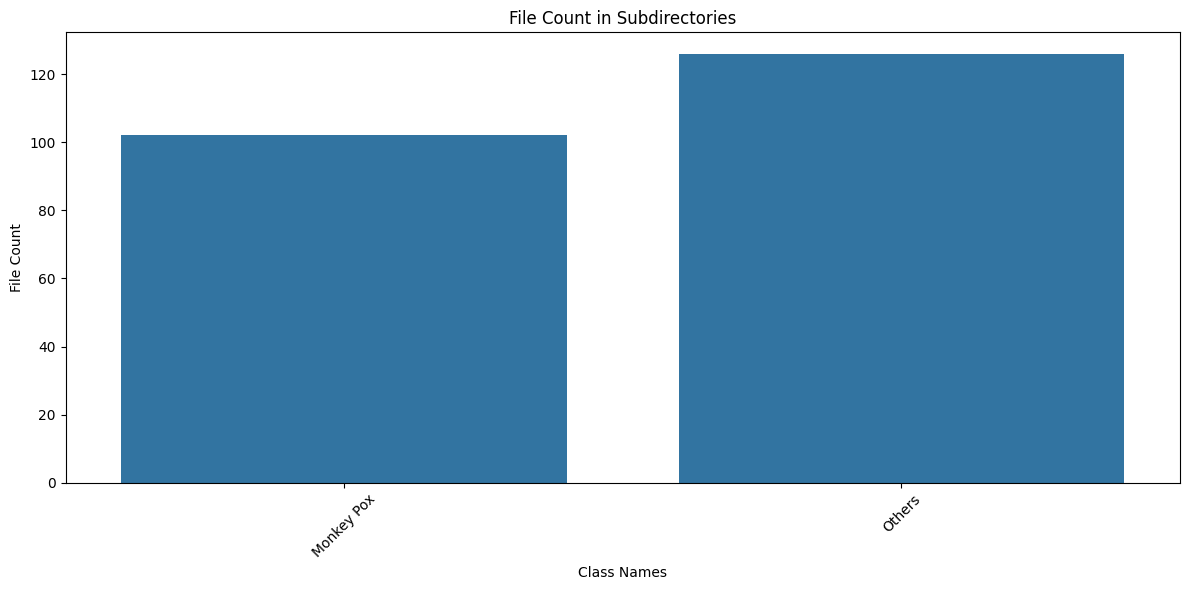

In [4]:
class_names = []
class_count = []

for root, dirs, files in os.walk(tpath):
    if len(files) > 0:  # Considering directories with files only
        class_names.append(os.path.basename(root))
        class_count.append(len(files))

plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=class_count)
plt.xticks(rotation=45)
plt.xlabel('Class Names')
plt.ylabel('File Count')
plt.title('File Count in Subdirectories')
plt.tight_layout()
plt.show()

In [7]:
class_names

['Monkey Pox', 'Others']

Found 228 images belonging to 2 classes.


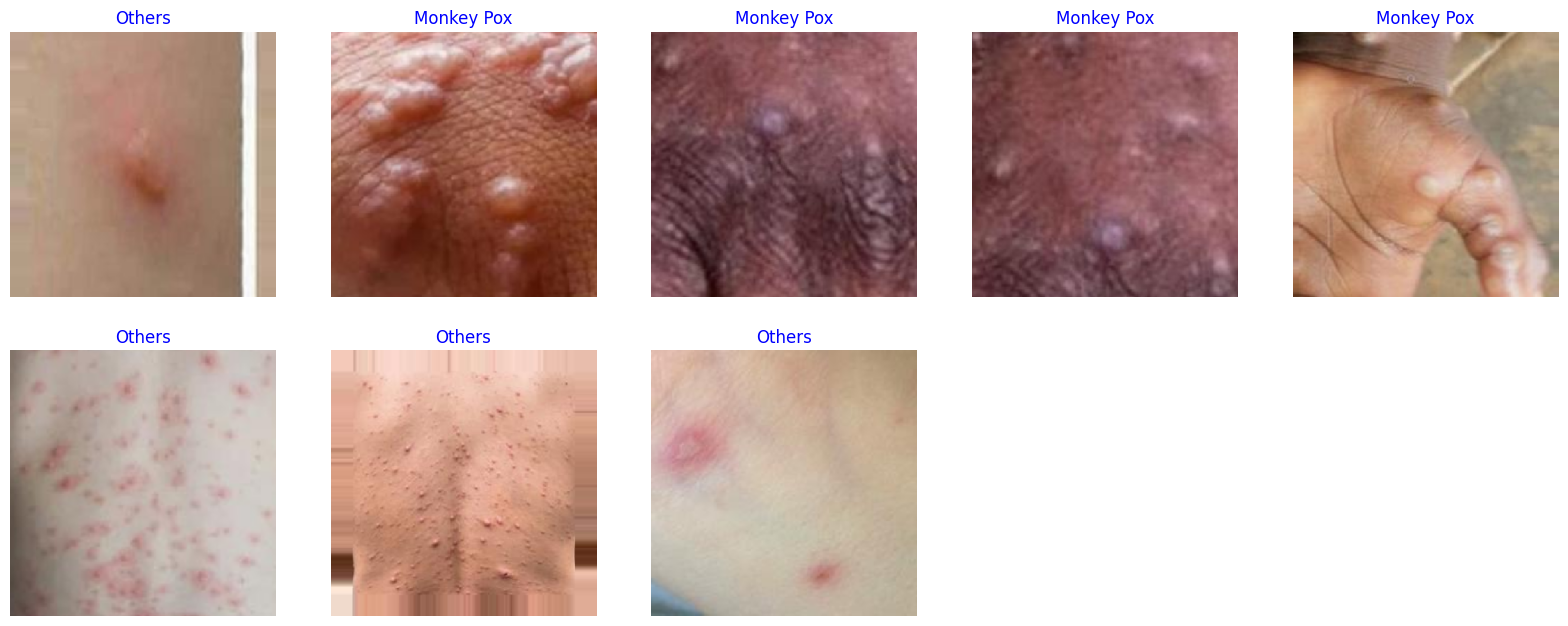

In [5]:
# Display images with their respective classes
train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_batch = train_gen.flow_from_directory(
    directory=tpath,
    target_size=(351, 351),
    batch_size=8,
)

g_dict = train_batch.class_indices
classes = list(g_dict.keys())
images, labels = next(train_batch)

length = len(labels)
sample = min(length, 30)

plt.figure(figsize=(20, 20))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

resnet_model = Sequential()

pretrained_model = keras.applications.ResNet50(
    include_top=False,
    input_shape=(300, 300, 3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3))  # Dropout layer
resnet_model.add(Dense(2, activation='softmax'))

# Menggunakan Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)  # Atur learning rate jika perlu
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])


In [38]:
# # resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.0009), metrics=['accuracy'])


# resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0009), metrics=['accuracy'])


In [7]:
epochs=10
history = resnet_model.fit(
    
  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
23/23 [==============================] - 30s 1s/step - loss: 1.3397 - accuracy: 0.6448 - val_loss: 0.5604 - val_accuracy: 0.7111
Epoch 2/10
23/23 [==============================] - 27s 1s/step - loss: 0.4459 - accuracy: 0.7869 - val_loss: 0.3047 - val_accuracy: 0.9111
Epoch 3/10
23/23 [==============================] - 27s 1s/step - loss: 0.2984 - accuracy: 0.8579 - val_loss: 0.2537 - val_accuracy: 0.9111
Epoch 4/10
23/23 [==============================] - 29s 1s/step - loss: 0.2512 - accuracy: 0.8907 - val_loss: 0.2729 - val_accuracy: 0.8889
Epoch 5/10
23/23 [==============================] - 28s 1s/step - loss: 0.1756 - accuracy: 0.9508 - val_loss: 0.2128 - val_accuracy: 0.9333
Epoch 6/10
23/23 [==============================] - 26s 1s/step - loss: 0.1140 - accuracy: 0.9781 - val_loss: 0.2185 - val_accuracy: 0.9333
Epoch 7/10
23/23 [==============================] - 28s 1s/step - loss: 0.0991 - accuracy: 0.9781 - val_loss: 0.2256 - val_accuracy: 0.9556
Epoch 8/10
23/23 [==

In [10]:
resnet_model.save('modelfix.h5')

c:\Users\Ghifary\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [44]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmp3a5fuvn2\assets


INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmp3a5fuvn2\assets


In [46]:
# # convert keras model to tflite 
# def get_file_size(file_path):
#     size = os.path.getsize(file_path)
#     return size

# def convert_bytes(size, unit=None):
#     if unit == "KB":
#         return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
#     elif unit == "MB":
#         return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
#     else:
#         return print('File size: ' + str(size) + ' bytes')

In [47]:
# from keras.models import load_model
# model = load_model("mp3.h5")

# TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
# tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = tf_lite_converter.convert()
# tflite_model_name = TF_LITE_MODEL_FILE_NAME
# open(tflite_model_name, "wb").write(tflite_model)
# convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# # or using another method

# # Save the model.
# with open('tflite_model_another.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmptitp1ymw\assets


INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmptitp1ymw\assets


File size: 95867.117 Kilobytes
INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmprq8z69bu\assets


INFO:tensorflow:Assets written to: C:\Users\Ghifary\AppData\Local\Temp\tmprq8z69bu\assets


# Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from joblib import dump, load  # Import modul joblib

In [2]:
url = "https://raw.githubusercontent.com/ghifaryabrarrabbani/dataset/main/Dataset.csv"

In [3]:
df = pd.read_csv(url, sep=";")

In [4]:
df.isna().sum()

Systemic disease                   0
Rectal pain                        0
Sore throat                        0
Penile edema                       0
Oral lesions                       0
Solitary lesions                   0
Swollen tonsils                    0
HIV infection                      0
Sexually transmitted infections    0
Monkey pox                         0
dtype: int64

In [5]:
encode1 =  pd.get_dummies(df, columns=['Systemic disease'])

In [6]:
# Kolom-kolom yang ingin diubah nilainya
columns_to_replace = ['Rectal pain', 'Sore throat', 'Penile edema', 'Oral lesions ', 'Solitary lesions', 'Swollen tonsils', 'HIV infection', 'Sexually transmitted infections']

# Lakukan penggantian nilai 'yes' menjadi 1 dan 'no' menjadi 0 pada kolom-kolom tersebut
encode1[columns_to_replace] = encode1[columns_to_replace].replace({'Yes': 1, 'No': 0})
encode1['Monkey pox'] = encode1['Monkey pox'].replace({'Infected':0, "No Infected":1})

In [7]:
desired_columns_order = ['Systemic disease_Swollen Lymph Nodes', 'Systemic disease_Muscle Aches and Pain', 'Systemic disease_Fever', 'Rectal pain', 'Sore throat', 'Penile edema', 'Oral lesions ', 'Solitary lesions', 'Swollen tonsils', 'HIV infection', 'Sexually transmitted infections', 'Monkey pox']

encode1 = encode1.reindex(columns=desired_columns_order)

In [13]:
encode1

,Systemic disease_Swollen Lymph Nodes,Systemic disease_Muscle Aches and Pain,Systemic disease_Fever,Rectal pain,Sore throat,Penile edema,Oral lesions,Solitary lesions,Swollen tonsils,HIV infection,Sexually transmitted infections,Monkey pox
0,False,True,False,1,1,1,1,0,1,1,0,0
1,True,False,False,0,0,0,1,1,1,1,1,0
2,False,True,False,0,0,1,1,1,1,0,1,0
3,False,True,False,1,1,0,1,0,0,1,0,0
4,True,False,False,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,True,False,1,1,1,1,0,0,0,1,1
377,False,True,False,0,0,0,0,0,0,1,0,1
378,False,False,True,0,1,0,0,0,1,1,1,0
379,False,False,True,0,1,1,0,1,0,0,0,0


In [8]:
# Kolom-kolom yang ingin diubah nilainya
columns_to_replace = ['Systemic disease_Swollen Lymph Nodes', 'Systemic disease_Muscle Aches and Pain', 'Systemic disease_Fever']

# Lakukan penggantian nilai 'True' menjadi 1 dan 'False' menjadi 0 pada kolom-kolom tersebut
for col in columns_to_replace:
    encode1[col] = encode1[col].replace({True: 1, False: 0})


In [15]:
encode1

,Systemic disease_Swollen Lymph Nodes,Systemic disease_Muscle Aches and Pain,Systemic disease_Fever,Rectal pain,Sore throat,Penile edema,Oral lesions,Solitary lesions,Swollen tonsils,HIV infection,Sexually transmitted infections,Monkey pox
0,0,1,0,1,1,1,1,0,1,1,0,0
1,1,0,0,0,0,0,1,1,1,1,1,0
2,0,1,0,0,0,1,1,1,1,0,1,0
3,0,1,0,1,1,0,1,0,0,1,0,0
4,1,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,0,1,1,1,1,0,0,0,1,1
377,0,1,0,0,0,0,0,0,0,1,0,1
378,0,0,1,0,1,0,0,0,1,1,1,0
379,0,0,1,0,1,1,0,1,0,0,0,0


In [9]:
encode1 = encode1.rename(columns={'Systemic disease_Swollen Lymph Nodes':'Swollen_Lymph_Nodes','Systemic disease_Muscle Aches and Pain':'Muscle_Aches_and_Pain',
                                  'Systemic disease_Fever':'Fever','Rectal pain':'Rectal_pain','Sore throat':'Sore_throat', 'Penile edema':'Penile_edema', 'Oral lesions ':'Oral_lesions', 'Solitary lesions':'Solitary_lesions', 
                                  'Swollen tonsils':'Swollen_tonsils', 'HIV infection':'HIV_infection', 'Sexually transmitted infections':'Sexually_transmitted_infections', 'Monkey pox':'Monkey_pox'})

In [17]:
encode1

,Swollen_Lymph_Nodes,Muscle_Aches_and_Pain,Fever,Rectal_pain,Sore_throat,Penile_edema,Oral_lesions,Solitary_lesions,Swollen_tonsils,HIV_infection,Sexually_transmitted_infections,Monkey_pox
0,0,1,0,1,1,1,1,0,1,1,0,0
1,1,0,0,0,0,0,1,1,1,1,1,0
2,0,1,0,0,0,1,1,1,1,0,1,0
3,0,1,0,1,1,0,1,0,0,1,0,0
4,1,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,0,1,1,1,1,0,0,0,1,1
377,0,1,0,0,0,0,0,0,0,1,0,1
378,0,0,1,0,1,0,0,0,1,1,1,0
379,0,0,1,0,1,1,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
datax = encode1.copy()
X = datax.drop(['Monkey_pox'],axis=1)
Y = encode1['Monkey_pox']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.1,random_state=42)

# Random Forest

In [12]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))
print("Presisi: {:.2f}%".format(precision_score * 100))
print("Recall: {:.2f}%".format(recall_score * 100))

Akurasi: 76.92%
F1 Score: 72.73%
Presisi: 80.00%
Recall: 66.67%


In [15]:
probabilities = clf.predict_proba(x_test)

In [24]:
first_five_probabilities = probabilities[:5]
print(first_five_probabilities)

[[0.84       0.16      ]
 [0.36       0.64      ]
 [0.27       0.73      ]
 [0.3        0.7       ]
 [0.56833333 0.43166667]]


In [29]:
from joblib import dump, load  # Import modul joblib

In [30]:
dump(clf, 'random_forest_model2.joblib')

['random_forest_model2.joblib']

In [16]:
import pickle

# Simpan model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Memuat model kembali
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
stop

# Coba

In [34]:
from keras.preprocessing import image
from keras.models import load_model

In [36]:
# Memuat model klasifikasi gambar (misalnya CNN) dari file mp.h5
model_cnn = load_model('mp.h5')

# Memuat model Random Forest dari file random_forest_model.joblib
model_random_forest = load('random_forest_model.joblib')

In [49]:
# Path gambar yang ingin diprediksi
image_path = 'C:\\Users\\Ghifary\\OneDrive\\Documents\\Kuliah\\Semester 5\\Alpro 2\\UAS\\Original Images\\Original Images\\Monkey Pox\\M01_02.jpg'
image_path2 = 'C:\\Users\\Ghifary\\OneDrive\\Documents\\Kuliah\\Semester 5\\Alpro 2\\UAS\\Original Images\\Original Images\\Others\\NM01_01.jpg'

# Membaca gambar dan melakukan preprocessing sesuai dengan model CNN
# img = image.load_img(image_path, target_size=(300, 300))  # Sesuaikan target size dengan ukuran model CNN
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)

In [42]:
data_uji = pd.DataFrame({
    'Swollen_Lymph_Nodes': [0],  # Contoh nilai variabel, ganti sesuai kebutuhan
    'Muscle_Aches_and_Pain': [0],
    'Fever': [0],
    'Rectal_pain': [0],
    'Sore_throat': [0],
    'Penile_edema': [0],
    'Oral_lesions': [0],
    'Solitary_lesions': [0],
    'Swollen_tonsils': [0],
    'HIV_infection': [0],
    'Sexually_transmitted_infections': [0]
})

In [47]:
image_path = ''

In [43]:
predictions2 = model_random_forest.predict_proba(data_uji)
predictions2

array([[0.23833333, 0.76166667]])

In [50]:
if not image_path:
    predictions2 = model_random_forest.predict_proba(data_uji)
    if predictions2[0][0] > 0.5:
        final2 = "monkeypox"
        hasil = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} a"
    else:
        final2 = "bukanmonkey"
        hasil = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} q"
    print("Hasil Prediksi Kedua:", hasil)
else:
    # Membaca gambar dan melakukan preprocessing sesuai dengan model CNN
    img = image.load_img(image_path, target_size=(300, 300))  # Sesuaikan target size dengan ukuran model CNN
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Lakukan prediksi dengan model klasifikasi gambar (CNN)
    predictions = model_cnn.predict(img_array)
    if predictions[0][0] > 0.5:
        final = "monkeypox"
        hasil = f"Prediksi {predictions[0][0] * 100:.2f}% mengalami penyakit {final} y"
        print(final, hasil)
    else:
        predictions2 = model_random_forest.predict_proba(data_uji)
        final = "bukanmonkey"
        hasil = f"Prediksi {predictions[0][0] * 100:.2f}% mengalami penyakit {final} t"
        print(final, hasil)
        if predictions2[0][0] > 0.5:
            final2 = "monkeypox"
            hasil2 = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} s"
            print(hasil2)
        else:
            final2 = "bukanmonkey"
            hasil2 = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} x"
            print(hasil2)

1/1 [==============================] - 1s 926ms/step
monkeypox Prediksi 95.72% mengalami penyakit monkeypox y


In [ ]:
# # Mengambil kelas dengan nilai probabilitas tertinggi sebagai prediksi
# predicted_class = 'monkeypox' if predictions[0][0] > 0.5 else 'others'
# hasil = f"Prediksi {(predictions[0][0] * 100):.2f}% mengalami penyakit {predicted_class}"

# print("Hasil Prediksi Akhir:", predicted_class, hasil)

Hasil Prediksi Akhir: monkeypox Prediksi 95.39% mengalami penyakit monkeypox


In [44]:
predictions2 = model_random_forest.predict(data_uji)

In [45]:
predictions2

array([1], dtype=int64)

In [46]:
probabilities = predictions2.predict_proba(data_uji)

AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

In [ ]:
ada_gambar_input = image_path

In [ ]:
if not ada_gambar_input:
    if predictions2[0][0] > 0.5:
        final2 = "monkeypox"
        hasil = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} a"
        print("Hasil Prediksi Kedua:", hasil)
    else:
        final2 = "bukanmonkey"
        hasil = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} q"
    print("Hasil Prediksi Kedua:", hasil)
else:
    # Melakukan prediksi jika ada gambar yang diinputkan
    if predictions[0][0] > 0.5:
        final = "monkeypox"
        hasil = f"Prediksi {predictions[0][0] * 100:.2f}% mengalami penyakit {final} y"
        print(final, hasil)
    else:
        final = "bukanmonkey"
        hasil = f"Prediksi {predictions[0][0] * 100:.2f}% mengalami penyakit {final} t"
        print(final, hasil)
        if predictions2[0][0] > 0.5:
            final2 = "monkeypox"
            hasil2 = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} s"
            print(hasil2)
        else:
            final2 = "bukanmonkey"
            hasil2 = f"Prediksi {predictions2[0][0] * 100:.2f}% mengalami penyakit {final2} x"
            print(hasil2)


monkeypox Prediksi 95.39% mengalami penyakit monkeypox y
